In [2]:
key = 'a5a8fcee979581066feea3e2df22d53d894c5fb9'

In [4]:
import pandas_datareader as pdr

In [6]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [11]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-07-17 00:00:00+00:00,149.56,150.90,148.57,148.82,23243713,35.389423,35.706498,35.155165,35.214321,92974852,0.0,1.0
1,AAPL,2017-07-18 00:00:00+00:00,150.08,150.13,148.67,149.20,17713795,35.512467,35.524298,35.178828,35.304238,70855180,0.0,1.0
2,AAPL,2017-07-19 00:00:00+00:00,151.02,151.42,149.95,150.48,20615419,35.734893,35.829543,35.481706,35.607116,82461676,0.0,1.0
3,AAPL,2017-07-20 00:00:00+00:00,150.34,151.74,150.19,151.50,17053326,35.573989,35.905262,35.538496,35.848473,68213304,0.0,1.0
4,AAPL,2017-07-21 00:00:00+00:00,150.27,150.44,148.88,149.99,24671002,35.557426,35.597652,35.228519,35.491171,98684008,0.0,1.0


In [12]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-07-08 00:00:00+00:00,147.04,147.55,145.0000,145.265,64547798,147.04,147.55,145.0000,145.265,64547798,0.0,1.0
1254,AAPL,2022-07-11 00:00:00+00:00,144.87,146.64,143.7800,145.670,63305113,144.87,146.64,143.7800,145.670,63305113,0.0,1.0
1255,AAPL,2022-07-12 00:00:00+00:00,145.86,148.45,145.0500,145.760,77588759,145.86,148.45,145.0500,145.760,77588759,0.0,1.0
1256,AAPL,2022-07-13 00:00:00+00:00,145.49,146.45,142.1201,142.990,71185560,145.49,146.45,142.1201,142.990,71185560,0.0,1.0
1257,AAPL,2022-07-14 00:00:00+00:00,148.47,148.95,143.2500,144.080,78140744,148.47,148.95,143.2500,144.080,78140744,0.0,1.0


In [7]:
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('AAPL.csv')

In [14]:
df1 = df.reset_index()['close']

In [16]:
df1.shape

(1258,)

In [17]:
df1

0       149.56
1       150.08
2       151.02
3       150.34
4       150.27
         ...  
1253    147.04
1254    144.87
1255    145.86
1256    145.49
1257    148.47
Name: close, Length: 1258, dtype: float64

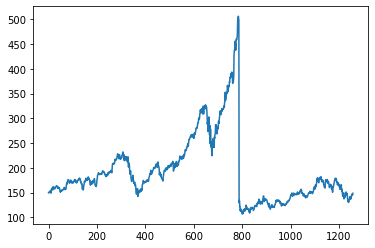

In [18]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [19]:
### LSTM are very sensitive to the scale of the data. apply MinMax scaler
import numpy as np

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1.shape

(1258, 1)

In [24]:
df1

array([[0.10700063],
       [0.10830307],
       [0.11065748],
       ...,
       [0.09773325],
       [0.09680651],
       [0.10427051]])

In [26]:
### splitting dataset into training and testing data
training_size = int(len(df1)*0.65)
test_size = len(df1)- training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1), :1]

In [28]:
training_size,test_size

(817, 441)

In [41]:
import numpy
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX) , numpy.array(dataY)

In [42]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [43]:
print(X_train)

[[0.10700063 0.10830307 0.11065748 ... 0.16082655 0.15769568 0.15729493]
 [0.10830307 0.11065748 0.10895429 ... 0.15769568 0.15729493 0.15571697]
 [0.11065748 0.10895429 0.10877896 ... 0.15729493 0.15571697 0.15649343]
 ...
 [0.50311835 0.5212774  0.51671885 ... 0.01547902 0.02419537 0.01582968]
 [0.5212774  0.51671885 0.53197245 ... 0.02419537 0.01582968 0.0206387 ]
 [0.51671885 0.53197245 0.52601127 ... 0.01582968 0.0206387  0.02036318]]


In [44]:
X_train.shape

(716, 100)

In [45]:
X_test.shape

(340, 100)

In [46]:
# reshape input to be [samples, time steps, features] which is required for  LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1 )
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1 )


In [48]:
### Creation of LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [54]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 545ms/step - loss: 0.0333 - val_loss: 0.0014
Epoch 2/100
12/12 [==============================] - 4s 293ms/step - loss: 0.0146 - val_loss: 0.0052
Epoch 3/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0102 - val_loss: 0.0014
Epoch 4/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0097 - val_loss: 3.4428e-04
Epoch 5/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0081 - val_loss: 4.6922e-04
Epoch 6/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0067 - val_loss: 2.5609e-04
Epoch 7/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0060 - val_loss: 2.3761e-04
Epoch 8/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0054 - val_loss: 3.2647e-04
Epoch 9/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0048 - val_loss: 2.7207e-04
Epoch 10/100
12/12 [==============================] - 3s 228ms/step

12/12 [==============================] - 3s 215ms/step - loss: 0.0013 - val_loss: 2.0033e-04
Epoch 79/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0013 - val_loss: 1.7716e-04
Epoch 80/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0012 - val_loss: 2.2302e-04
Epoch 81/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0012 - val_loss: 1.8753e-04
Epoch 82/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0012 - val_loss: 2.2646e-04
Epoch 83/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0024 - val_loss: 3.4355e-04
Epoch 84/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0020 - val_loss: 2.8717e-04
Epoch 85/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0039 - val_loss: 1.6501e-04
Epoch 86/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0031 - val_loss: 2.2353e-04
Epoch 87/100
12/12 [==============================] - 3s 21

In [59]:
### Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [60]:
### Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

232.1435291463753

In [63]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

149.01928123765435

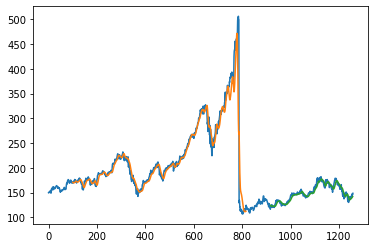

In [64]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# shift baselineand prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()